In [2]:
from materials import (
    MATERIALS, HARDENING
)
from generators import InputsSignals
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
import os
plt.rcParams.update({"text.usetex": True, "font.family": "Computer Modern"})

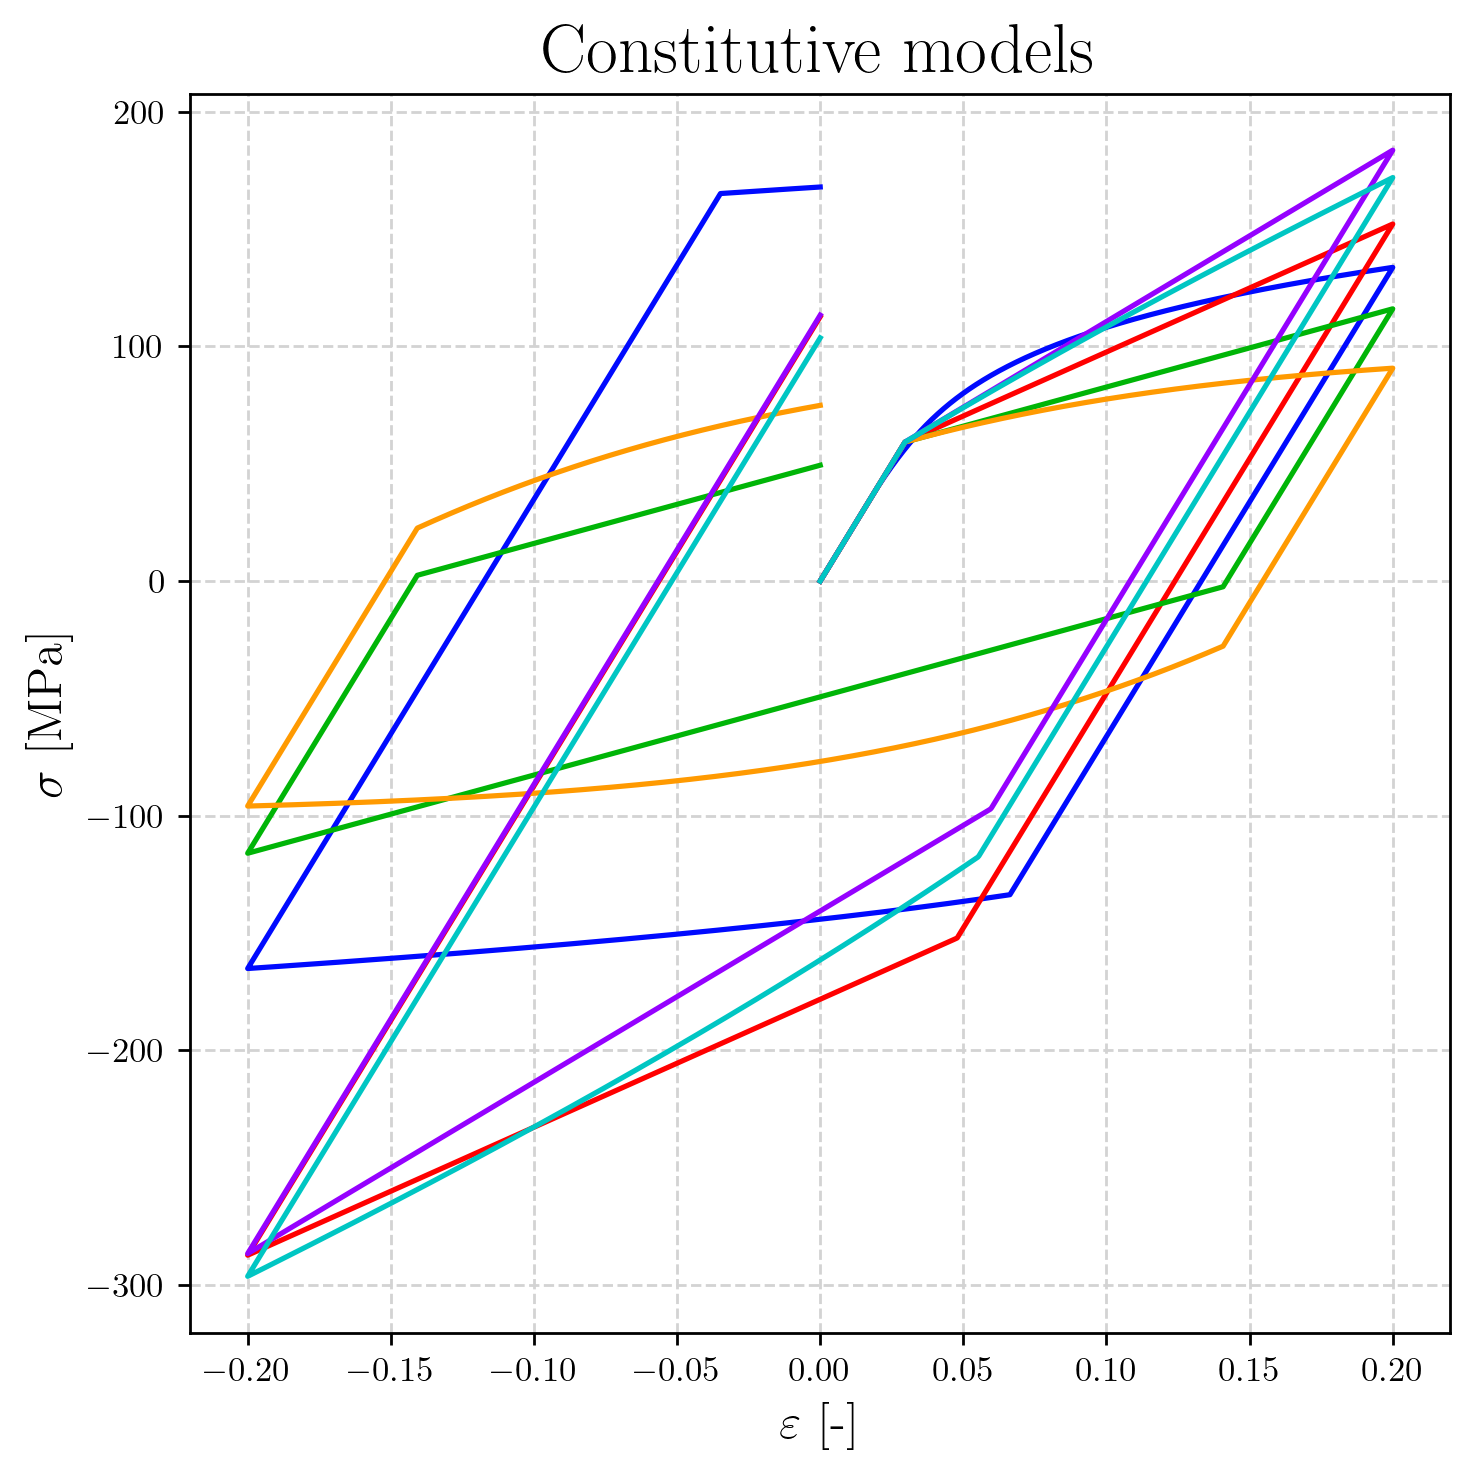

In [43]:
eps_max = 0.2

plt.figure(figsize=(6,6),dpi=250)
plt.title('Constitutive models',fontsize=20)
eps = np.concatenate([
    np.linspace(0,eps_max,1000),
    np.linspace(eps_max,-eps_max,1000),
    np.linspace(-eps_max,0,1000)
])
for name, mat in MATERIALS.items():
    sig, _, _ = HARDENING(eps,mat['E'],mat['dalpha'],mat['Y'])
    plt.plot(eps,sig/1e6,label=name,color=MATERIALS[name]['color'],lw=1.5)
# plt.legend(loc='upper left',fontsize=10)
plt.xlabel(r'$\varepsilon$ [-]',fontsize=14)
plt.ylabel(r'$\sigma$ [MPa]',fontsize=14)
plt.grid(ls='--',c='lightgray')
plt.tight_layout()
plt.show()

In [2]:
folder_path = osp.join('input','random')
files = os.listdir(folder_path)
random_inputs = [InputsSignals(osp.join(folder_path,file)) for file in files]

folder_path = osp.join('input','static')
files = os.listdir(folder_path)
static_inputs = [InputsSignals(osp.join(folder_path,file)) for file in files]

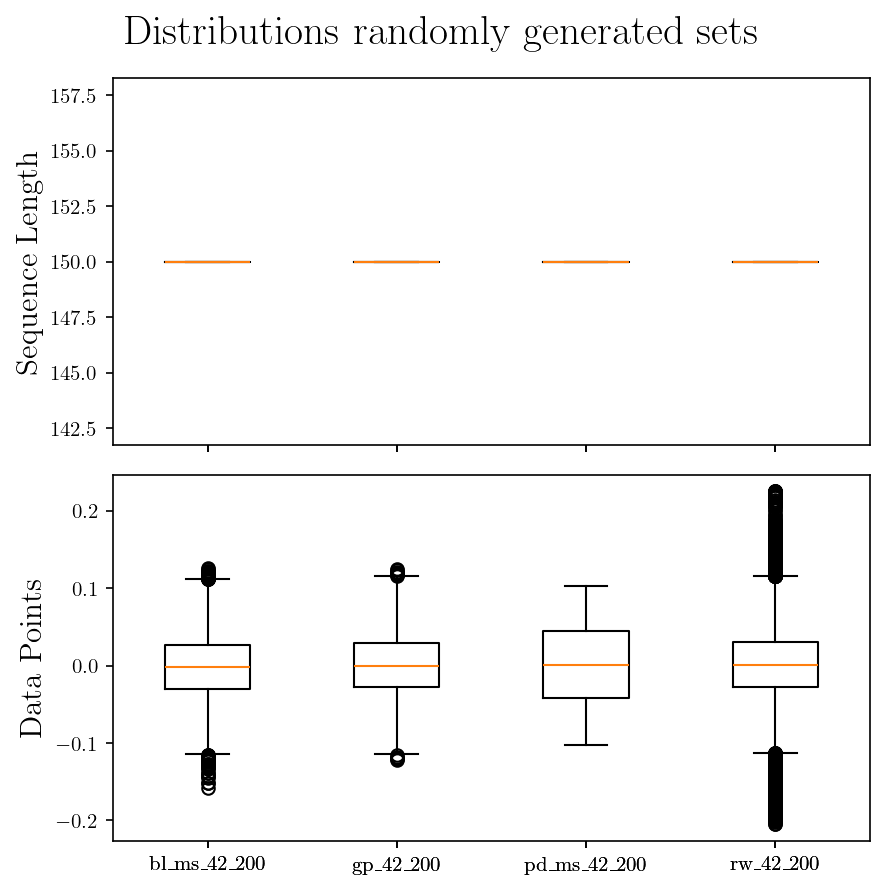

In [3]:
fig, ax = plt.subplots(2,figsize=(6, 6), dpi=150,sharex=True)

fig.suptitle('Distributions randomly generated sets',fontsize=20)

ax[0].boxplot(
    [data.lengths for data in random_inputs], 
    tick_labels=[data.name for data in random_inputs], 
)
ax[0].set_ylabel('Sequence Length',fontsize=15)

ax[1].boxplot(
    [np.concatenate(data_set.u_list) for data_set in random_inputs], 
    tick_labels=[data_set.name for data_set in random_inputs], 
)
ax[1].set_ylabel('Data Points',fontsize=15)
plt.tight_layout()
plt.show()

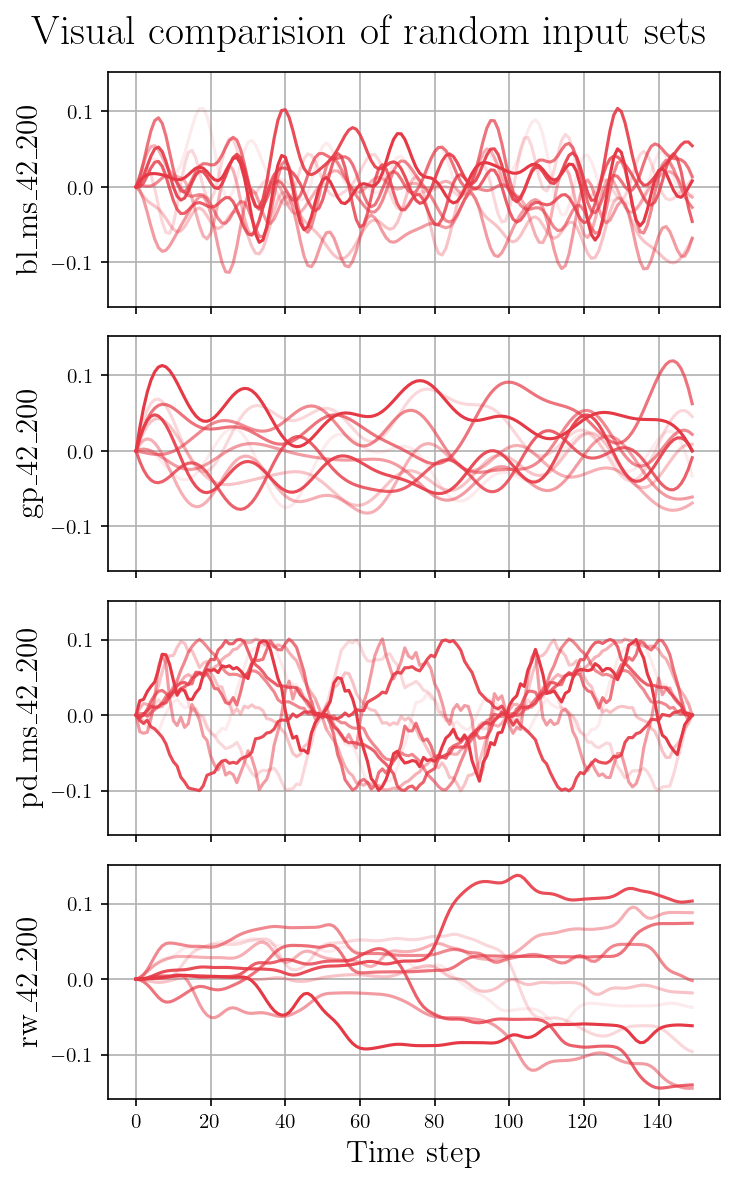

In [9]:
num = len(random_inputs)
fig, ax = plt.subplots(num,figsize=(5,2*num), dpi=150,sharex=True,sharey=True)
fig.suptitle('Visual comparision of random input sets',fontsize=20)

for i in range(num):
    random_inputs[i].plot_samples(ax=ax[i],num_samples=10)
    ax[i].set_ylabel(f'{random_inputs[i].name}',fontsize=15)
ax[-1].set_xlabel('Time step',fontsize=15)
plt.tight_layout()
plt.show()

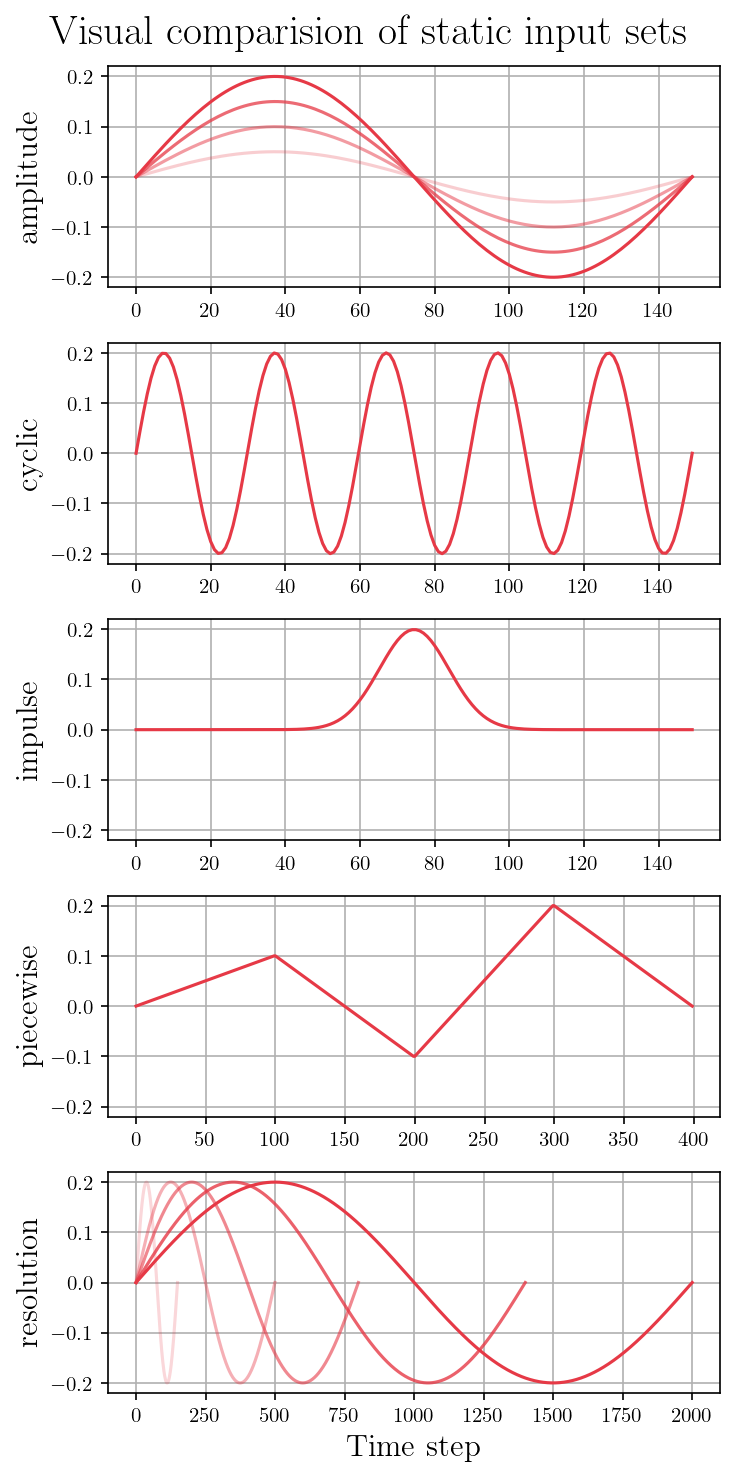

In [10]:
num = len(static_inputs)
fig, ax = plt.subplots(num,figsize=(5,2*num), dpi=150,sharex=False,sharey=True)
fig.suptitle('Visual comparision of static input sets',fontsize=20)

for i in range(num):
    static_inputs[i].plot_samples(ax=ax[i],num_samples=10)
    ax[i].set_ylabel(f'{static_inputs[i].name}',fontsize=15)
ax[-1].set_xlabel('Time step',fontsize=15)
plt.tight_layout()
plt.show()

# Check saved responeses

In [1]:
from materials import load_responses, plot_responses

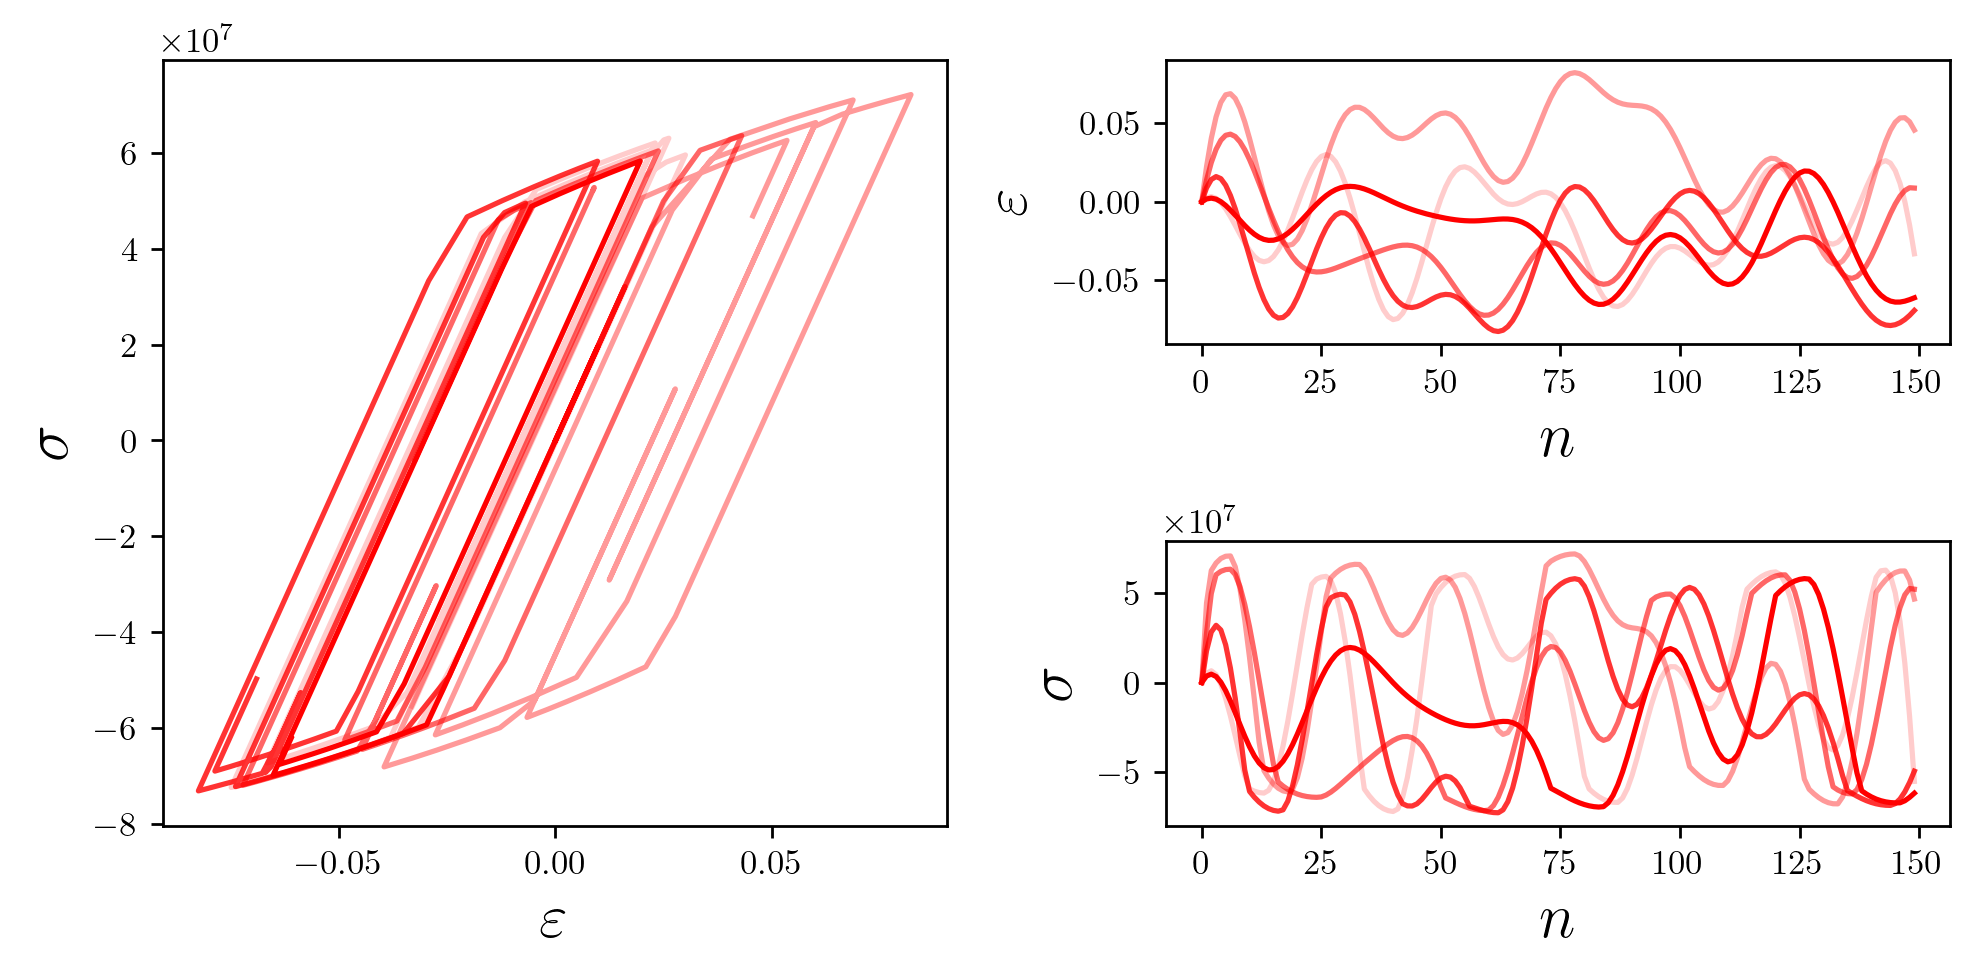

In [2]:
mat_name = 'kinematic-armstrong-fredrick'
inp_type = 'random'
inp_name = 'gp_42_200'

eps_list, sig_list = load_responses(mat_name, inp_type, inp_name)
plot_responses(eps_list[:5], sig_list[:5])

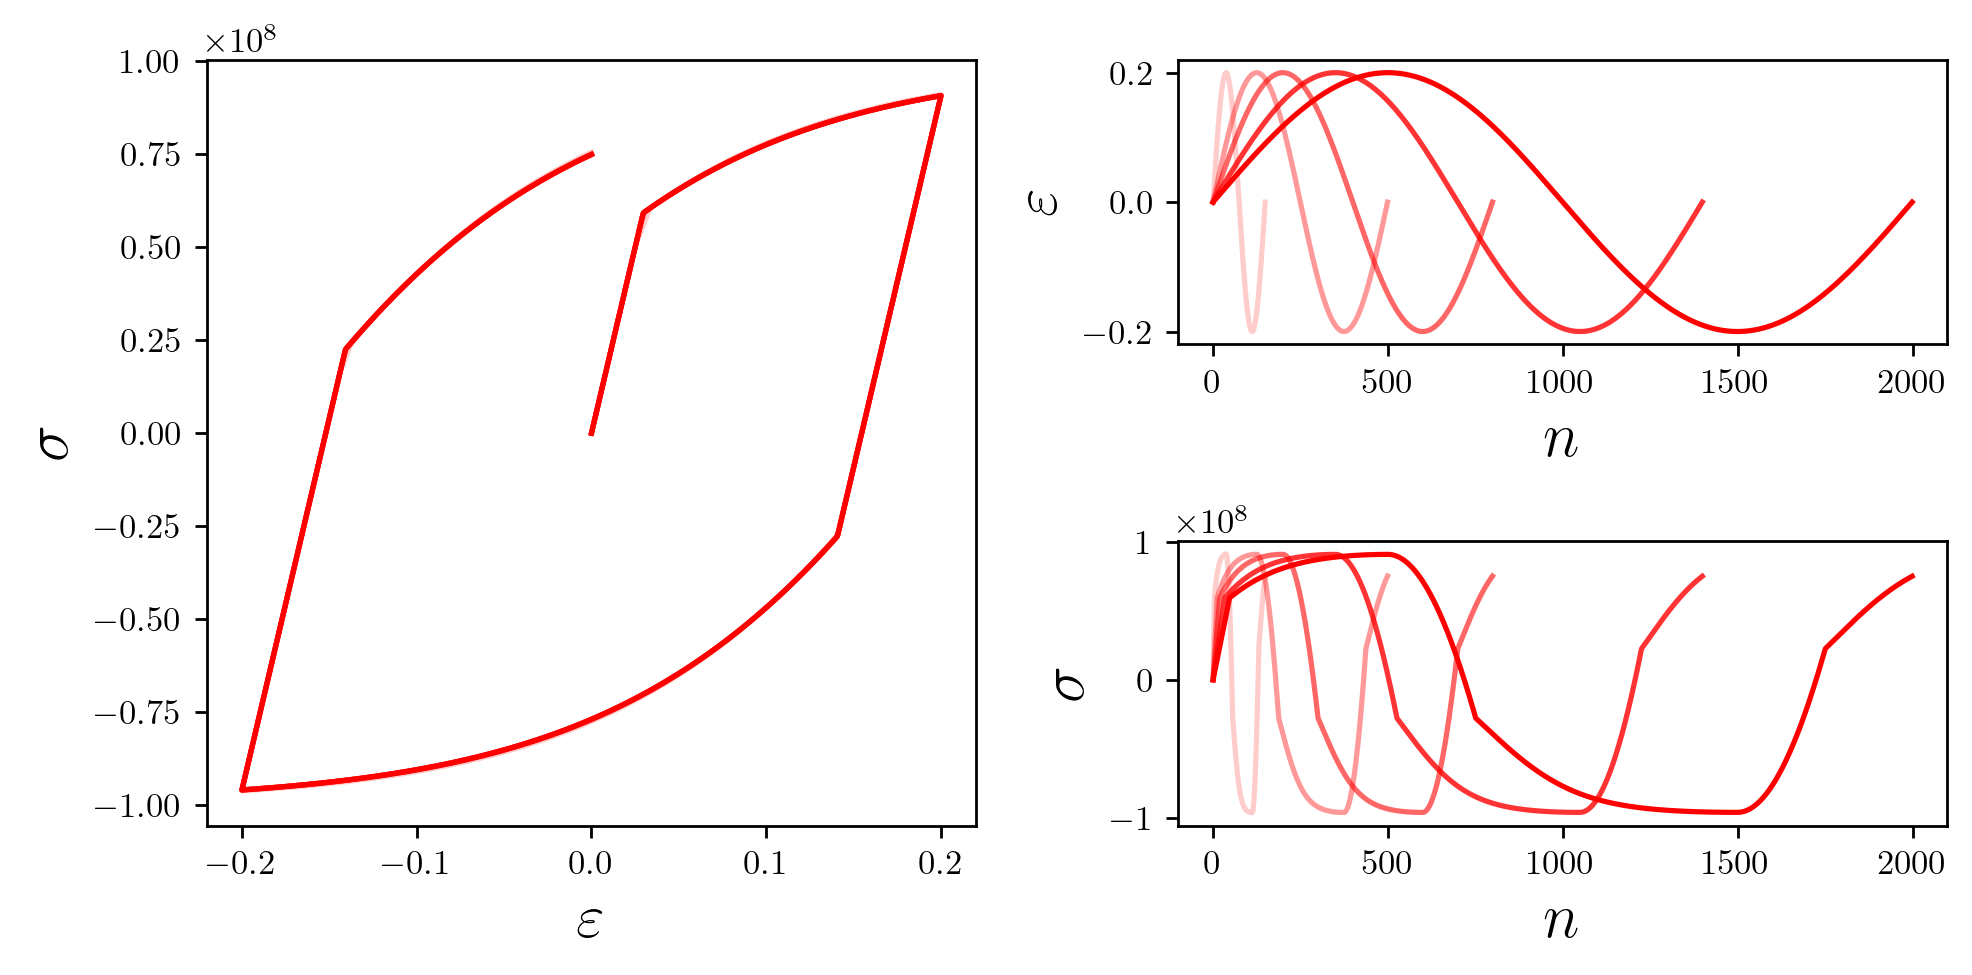

In [4]:
mat_name = 'kinematic-armstrong-fredrick'
inp_type = 'static'
inp_name = 'resolution'

eps_list, sig_list = load_responses(mat_name, inp_type, inp_name)
plot_responses(eps_list[:5], sig_list[:5])

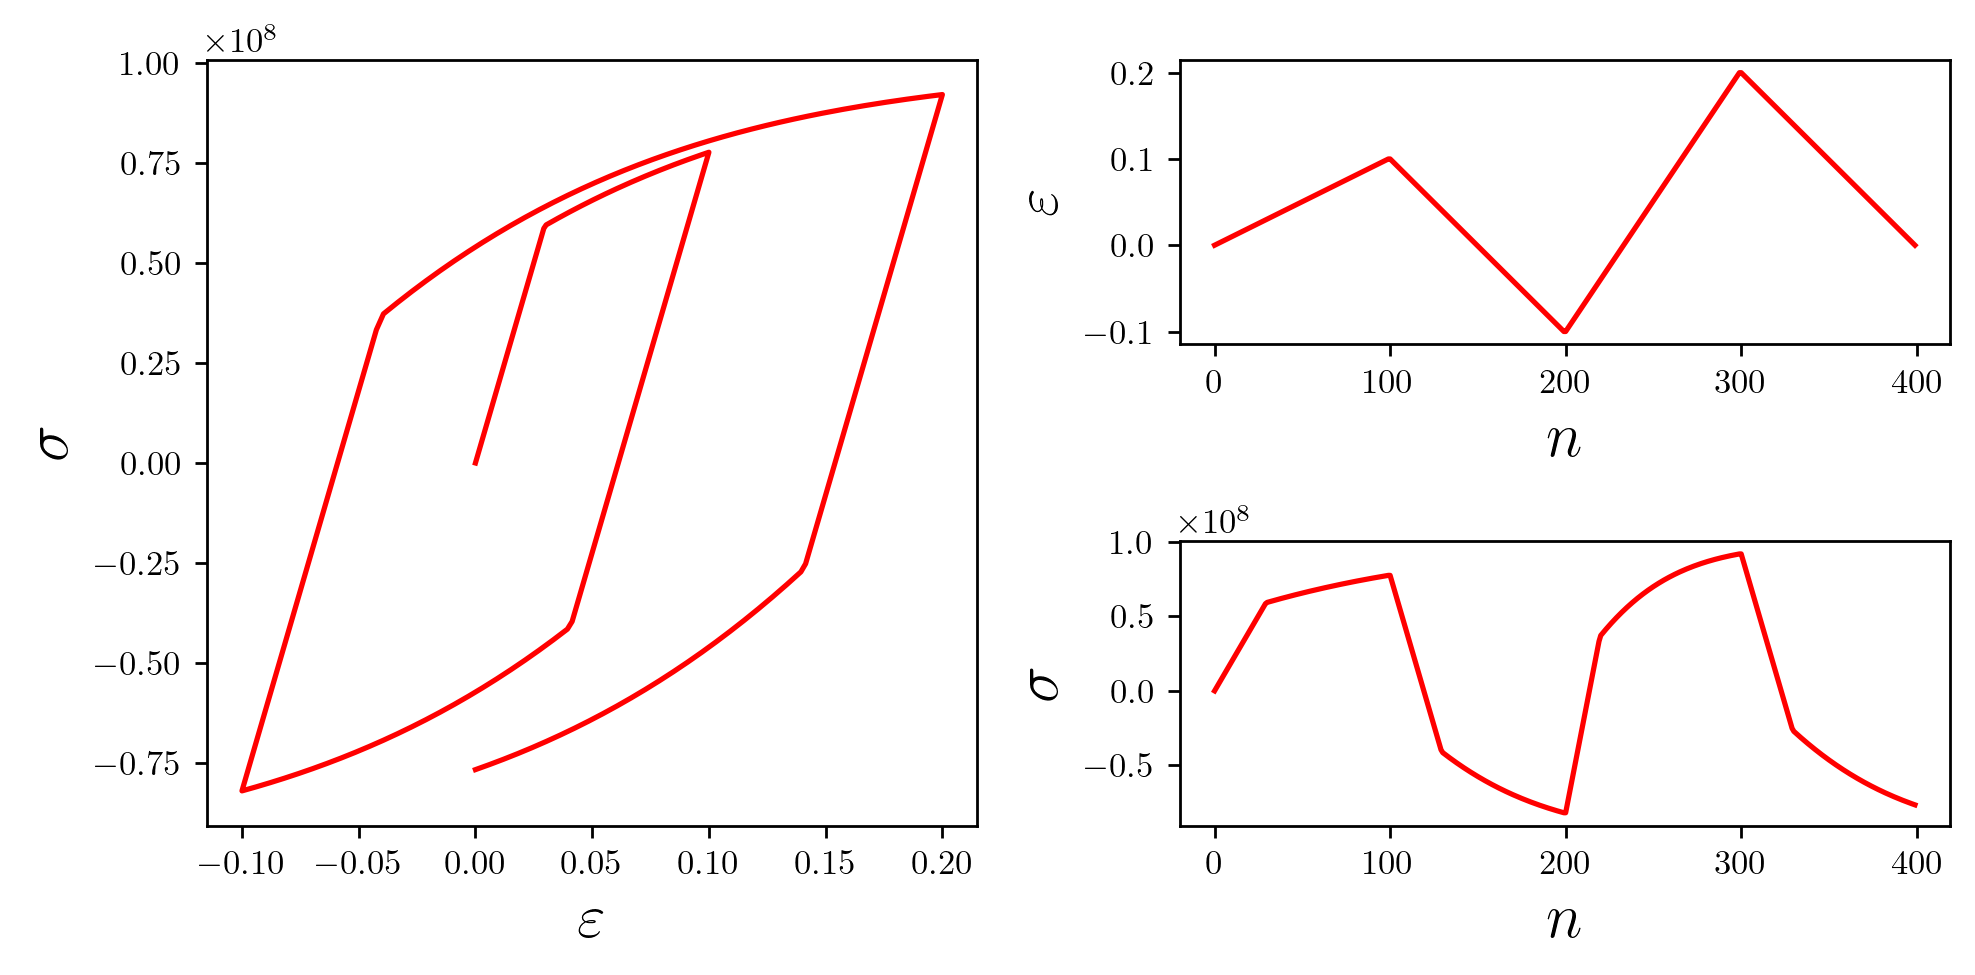

In [5]:
mat_name = 'kinematic-armstrong-fredrick'
inp_type = 'static'
inp_name = 'piecewise'

eps_list, sig_list = load_responses(mat_name, inp_type, inp_name)
plot_responses(eps_list[:5], sig_list[:5])